# 📊 **Data Mining Preliminary Project**

**Group Members**
- Nathanael Chris Abrigo
- Dwight Kenneth Cruz
- Joshua Kyle Kessel Entrata
- Edjin Jerney Payumo

#### **Importing Libraries**

In [1]:
### Importing Libraries

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Setup for the notebook
pd.set_option('display.max_columns', None)
%matplotlib inline


#### Load the preprocessed dataset

In [2]:
# Loading the 2023 FIES Dataset Volume 2
final_fies = pd.read_csv('../../data/processed/final_fies.csv')


In [3]:
final_fies

,W_REGN,W_PROV,SEQ_NO,RPROV,FSIZE,REG_SAL,SEASON_SAL,WAGES,NETSHARE,CASH_ABROAD,CASH_DOMESTIC,RENTALS_REC,INTEREST,PENSION,DIVIDENDS,OTHER_SOURCE,NET_RECEIPT,REGFT,NET_CFG,NET_LPR,NET_FISH,NET_FOR,NET_RET,NET_MFG,NET_TRANS,NET_NEC_A8,NET_NEC_A9,NET_NEC_A10,EAINC,LOSSES,BREAD,MEAT,FISH,MILK,OIL,FRUIT,VEG,SUGAR,FOOD_NEC,FRUIT_VEG,COFFEE,TEA,COCOA,WATER,SOFTDRINKS,OTHER_NON_ALCOHOL,ALCOHOL,TOBACCO,OTHER_VEG,SERVICES_PRIMARY_GOODS,ALCOHOL_PROCDUCTION_SERVICES,FOOD_HOME,FOOD_OUTSIDE,FOOD,CLOTH,HOUSING_WATER,ACTRENT,IMPUTED_RENT,BIMPUTED_RENT,RENTVAL,FURNISHING,HEALTH,TRANSPORT,COMMUNICATION,RECREATION,EDUCATION,INSURANCE,MISCELLANEOUS,DURABLE,OCCASION,OTHER_EXPENDITURE,OTHER_DISBURSEMENT,FOOD_ACCOM_SRVC,NFOOD,TOINC,TOTEX,TOTDIS,OTHREC,TOREC,RPSU,RFACT,MEM_RFACT,URB,PERCAPITA,NPCINC,RPCINC,PRPCINC,PPCINC,RPCINC_NIR,W_REGN_NIR,SOCIAL_CLASS
0,13,39,105930,3900,4.0,352200,0,352200,0,0,0,0,0,0,0,0,0,2276.0,0,0,0,0,0,0,0,0,0,0,0,0,27979.0,30420.0,16640.0,2020.0,4620.0,3340.0,8710.0,1595.0,2490.0,0.0,5475.0,0.0,0.0,2470.0,0.0,0.0,0.0,0.0,0.0,0,0,105759.0,81565.0,187324.0,2370,36660,0,15000,3000,18000,2674,1860,6344,8200,0,0,8166,7122,0,0,0,900,0,73396.0,369476.0,260720.0,261620.0,5000,374476.0,2151,405.804138,1479.726685,1,92369.000000,7,4,5,5,4,13,Low income
1,13,39,105931,3900,5.5,219760,0,219760,0,60000,0,80000,0,0,0,0,0,500.0,0,0,0,0,0,0,0,0,0,0,0,0,39031.0,24925.0,18200.0,8900.0,1565.0,4640.0,10450.0,660.0,1685.0,0.0,3215.0,0.0,0.0,1690.0,0.0,0.0,0.0,9200.0,0.0,0,0,114961.0,114000.0,228961.0,2650,70440,0,37800,0,37800,5510,21595,3720,13660,5080,0,0,14996,0,500,0,0,0,147351.0,398060.0,376312.0,376312.0,40000,438060.0,2151,405.804138,2034.624191,1,72374.546875,6,3,3,3,3,13,Lower-middle income
2,13,39,105932,3900,2.0,0,0,0,0,0,6000,0,0,0,0,0,0,500.0,0,0,0,0,156000,0,0,0,0,0,156000,0,20289.0,17320.0,8450.0,1630.0,1565.0,1430.0,22425.0,2085.0,2490.0,0.0,5475.0,0.0,0.0,2470.0,0.0,0.0,0.0,0.0,0.0,0,0,85629.0,10400.0,96029.0,2730,37380,6000,12000,0,18000,4742,1690,6500,5200,100,150,0,6654,0,1500,0,10000,0,66646.0,174500.0,162675.0,172675.0,8000,182500.0,2151,405.804138,739.863342,1,87250.000000,7,4,4,4,4,13,Poor
3,13,39,105933,3900,7.5,338800,0,338800,0,0,1000,0,0,0,0,0,0,200.0,0,0,0,0,0,0,84000,0,0,0,84000,0,37285.0,37050.0,31200.0,5125.0,1500.0,5230.0,5800.0,1055.0,3420.0,0.0,10956.0,0.0,0.0,1560.0,455.0,0.0,0.0,1840.0,0.0,0,0,140636.0,161600.0,302236.0,960,69760,0,48000,0,48000,3300,300,5668,7800,1820,0,0,14956,0,1100,0,5000,0,107504.0,472000.0,409740.0,414740.0,7500,479500.0,2151,405.804138,2774.487534,1,62933.332031,5,2,2,2,2,13,Lower-middle income
4,13,39,105934,3900,11.0,471720,0,471720,0,0,6600,0,0,0,0,0,0,0.0,0,0,0,0,312000,0,0,0,0,0,312000,0,53135.0,40040.0,50160.0,8610.0,2145.0,3510.0,17290.0,2857.0,2495.0,0.0,10950.0,0.0,0.0,3380.0,0.0,0.0,9360.0,0.0,0.0,0,0,194572.0,238080.0,432652.0,2200,61940,0,30000,0,30000,6118,1800,39000,15600,0,0,5826,17400,0,6000,4500,60900,0,169744.0,820320.0,602396.0,663296.0,55000,875320.0,2151,405.804138,4069.248383,1,74574.546875,6,3,3,3,3,13,Lower-middle income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19487,13,76,126615,7607,5.0,249360,0,249360,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,166500,0,0,0,166500,0,28555.0,21406.0,12900.0,16920.0,2820.0,1870.0,3640.0,1675.0,2830.0,0.0,3042.0,0.0,0.0,2600.0,870.0,0.0,5100.0,2600.0,0.0,0,0,99128.0,30700.0,129828.0,2410,105940,0,72000,0,72000,10174,5250,14300,12374,75,0,10800,16155,0,0,2000,3800,0,187178.0,487860.0,317006.0,320806.0,0,487860.0,780,216.904846,977.090073,1,97572.000000,7,5,4,5,5,13,Low income
19488,13,76,126616,7607,1.0,215720,0,215720,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,12363.0,6280.0,4070.0,1050.0,336.0,725.0,840.0,150.0

In [4]:
# Define the correct order for SOCIAL_CLASS
final_fies['SOCIAL_CLASS'] = pd.Categorical(
    final_fies['SOCIAL_CLASS'], 
    categories=['Poor', 'Low income', 'Lower-middle income', 'Middle income'], 
    ordered=True
)

Housing Expenditures as a Percentage of Non-Food Expenses by Social Class

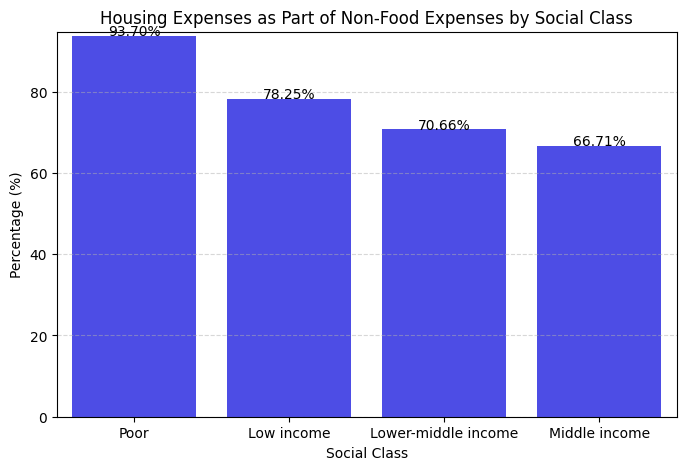

In [5]:
# Group by social class and calculate mean percentage of housing expenses
housing_percentages = final_fies.groupby('SOCIAL_CLASS', observed=True).apply(
    lambda x: ((x['HOUSING_WATER'] + x['FURNISHING'] + x['IMPUTED_RENT']) / x['NFOOD']).mean() * 100,
    include_groups=False
)

# Bar plot for better visualization of small percentages
plt.figure(figsize=(8, 5))
sns.barplot(x=housing_percentages.index, y=housing_percentages.values, color='blue', alpha=0.8)

# Add percentage labels for clarity
for i, v in enumerate(housing_percentages.values):
    plt.text(i, v + 0.1, f'{v:.2f}%', ha='center')

plt.title('Housing Expenses as Part of Non-Food Expenses by Social Class')
plt.xlabel('Social Class')
plt.ylabel('Percentage (%)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.ylim(0, max(housing_percentages.values) + 1)  # Adjust y-axis for better visibility
plt.show()


This visualization shows that housing-related expenses take up the largest share of non-food spending among poorer households, with the poorest group allocating 93.70%. As income rises, this share decreases (78.25% for low-income, 70.66% for lower-middle, and 66.71% for middle-income), indicating greater financial flexibility. The high housing burden on low-income groups highlights the need for affordable housing policies.

C:\Users\Judiciel Cruz\AppData\Local\Temp\ipykernel_16828\3354279226.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  final_fies.groupby('SOCIAL_CLASS')[['HOUSING_WATER', 'FURNISHING', 'IMPUTED_RENT']].mean().plot(kind='bar', figsize=(10, 5))


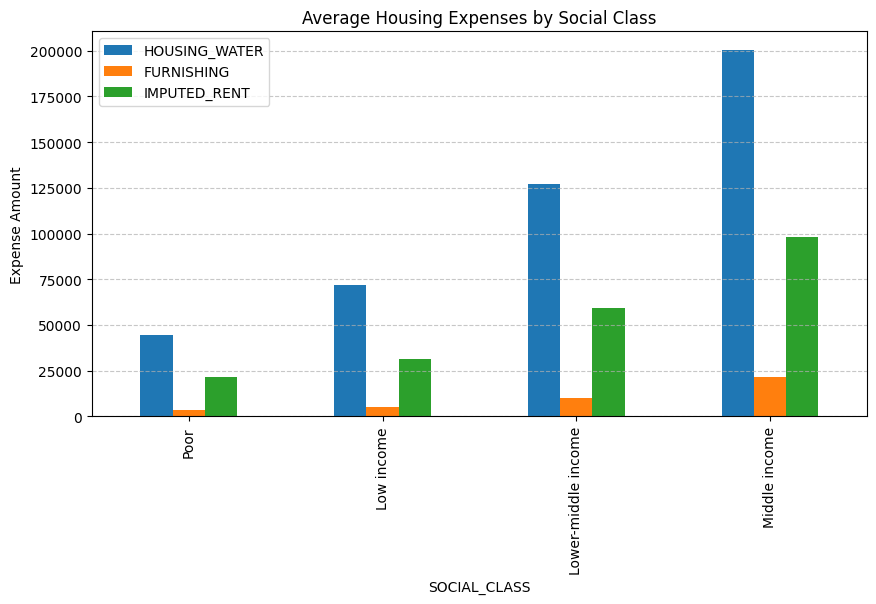

In [28]:
final_fies.groupby('SOCIAL_CLASS')[['HOUSING_WATER', 'FURNISHING', 'IMPUTED_RENT']].mean().plot(kind='bar', figsize=(10, 5))
plt.title("Average Housing Expenses by Social Class")
plt.ylabel("Expense Amount")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


-Housing expenses increase with social class: Middle-income households spend the most on housing-related costs, followed by lower-middle income, low income, and poor households.

-Housing Water is the largest expense across all social classes: It makes up the biggest portion of housing expenses, and its value rises significantly as social class increases.

-Imputed Rent becomes more significant for higher-income groups: Poor and low-income households spend less on imputed rent, but it increases for middle-income households.

-Furnishing remains the smallest category: Across all social classes, furnishing expenses are relatively low compared to other categories.

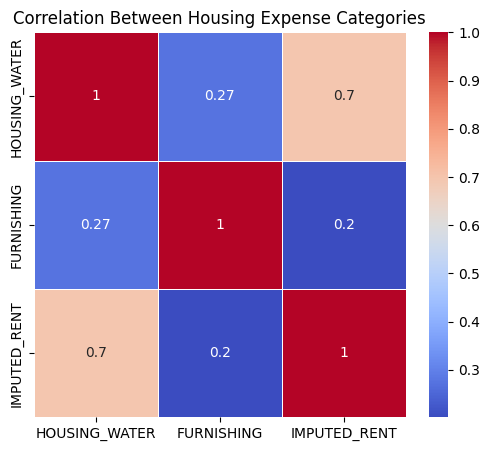

In [17]:
plt.figure(figsize=(6, 5))
sns.heatmap(final_fies[['HOUSING_WATER', 'FURNISHING', 'IMPUTED_RENT']].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Housing Expense Categories")
plt.show()


-HOUSING_WATER and IMPUTED_RENT have a strong positive correlation (0.7). Households that spend more on housing water also tend to have higher imputed rent expenses.

-HOUSING_WATER and FURNISHING have a weak correlation (0.27). Spending on housing water has little connection with furnishing expenses, suggesting they are independent.

-FURNISHING and IMPUTED_RENT have the weakest correlation (0.2). Households spending more on furnishing do not necessarily have higher imputed rent expenses.

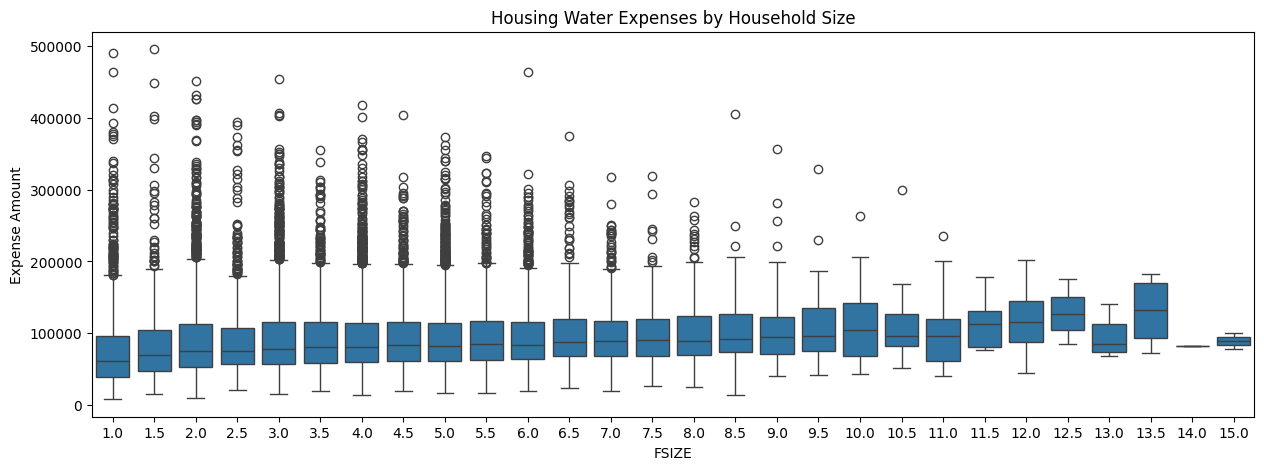

In [26]:
plt.figure(figsize=(15, 5))
sns.boxplot(x=final_fies['FSIZE'], y=final_fies['HOUSING_WATER'])
plt.title("Housing Water Expenses by Household Size")
plt.ylabel("Expense Amount")
plt.show()


-Median Expense Remains Stable: The median expense across household sizes is consistent, meaning water costs do not drastically increase with more members.

-Increase in Expense Range with Household Size: The spread (IQR) increases for larger households, indicating some families spend significantly more.

-Presence of Many Outliers: There are numerous outliers, especially for smaller households, suggesting some homes have unusually high water expenses.

-Larger Households Have Higher Maximum Expenses: The whiskers extend higher for larger households, meaning some big families pay much more for water.